<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Encode-the-Categorical-columns:-City,-Toss_decision-and-Venue." data-toc-modified-id="Encode-the-Categorical-columns:-City,-Toss_decision-and-Venue.-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Encode the Categorical columns: City, Toss_decision and Venue.</a></span></li></ul></li><li><span><a href="#Split-dataset-X-into-Train-and-Test" data-toc-modified-id="Split-dataset-X-into-Train-and-Test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Split dataset X into Train and Test</a></span></li><li><span><a href="#Model-Performance-Metrics-Function." data-toc-modified-id="Model-Performance-Metrics-Function.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Performance Metrics Function.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Compare-ROC-curves-and-Calculate-Area-under-the-curve-for-all-models" data-toc-modified-id="Compare-ROC-curves-and-Calculate-Area-under-the-curve-for-all-models-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Compare ROC curves and Calculate Area under the curve for all models</a></span></li></ul></li></ul></li><li><span><a href="#Building-a-Random-Forest-Classifier-Model-and-fit-it-on-the-Training-Set" data-toc-modified-id="Building-a-Random-Forest-Classifier-Model-and-fit-it-on-the-Training-Set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building a Random Forest Classifier Model and fit it on the Training Set</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-Cross-Validation-of-Random-Forest-Features" data-toc-modified-id="Grid-Search-Cross-Validation-of-Random-Forest-Features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Grid Search Cross Validation of Random Forest Features</a></span></li><li><span><a href="#Generate-Training-data-Model-performance-Metrics" data-toc-modified-id="Generate-Training-data-Model-performance-Metrics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generate Training data Model performance Metrics</a></span></li></ul></li><li><span><a href="#Verify-the-Predictions-on-Testing-Dataset" data-toc-modified-id="Verify-the-Predictions-on-Testing-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Verify the Predictions on Testing Dataset</a></span></li><li><span><a href="#Get-Predicted-Winner-for-the-given-input-below." data-toc-modified-id="Get-Predicted-Winner-for-the-given-input-below.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get Predicted Winner for the given input below.</a></span></li><li><span><a href="#Testing-the-Code-and-lookup-values" data-toc-modified-id="Testing-the-Code-and-lookup-values-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Testing the Code and lookup values</a></span></li></ul></div>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve


In [39]:
matches=pd.read_csv('matches.csv')
#deliveries=pd.read_csv('deliveries.csv')
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2008,Bengaluru,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,Kolkata Knight Riders,140.0,0.0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0.0,Chennai Super Kings,33.0,0.0,MEK Hussey,Punjab Cricket Association Stadium Mohali,MR Benson,SL Shastri,NaN
2,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0.0,Delhi Daredevils,0.0,9.0,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0.0,Royal Challengers Bangalore,0.0,5.0,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0.0,Kolkata Knight Riders,0.0,5.0,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [40]:
matches2023 = matches.copy()

In [41]:
matches.drop(columns=['umpire1','umpire2','umpire3','date','result','dl_applied'], inplace=True)
matches.head()

,season,city,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2008,Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140.0,0.0,BB McCullum,M Chinnaswamy Stadium
1,2008,Chandigarh,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,33.0,0.0,MEK Hussey,Punjab Cricket Association Stadium Mohali
2,2008,Delhi,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,Delhi Daredevils,0.0,9.0,MF Maharoof,Feroz Shah Kotla
3,2008,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,0.0,5.0,MV Boucher,Wankhede Stadium
4,2008,Kolkata,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,Kolkata Knight Riders,0.0,5.0,DJ Hussey,Eden Gardens


In [42]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1020 non-null   int64  
 1   city             1020 non-null   object 
 2   team1            1020 non-null   object 
 3   team2            1020 non-null   object 
 4   toss_winner      973 non-null    object 
 5   toss_decision    973 non-null    object 
 6   winner           969 non-null    object 
 7   win_by_runs      973 non-null    float64
 8   win_by_wickets   973 non-null    float64
 9   player_of_match  969 non-null    object 
 10  venue            1020 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 87.8+ KB


In [43]:
matches.dropna(axis=0, subset=['season', 'winner'], inplace=True)
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 972
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           969 non-null    int64  
 1   city             969 non-null    object 
 2   team1            969 non-null    object 
 3   team2            969 non-null    object 
 4   toss_winner      969 non-null    object 
 5   toss_decision    969 non-null    object 
 6   winner           969 non-null    object 
 7   win_by_runs      969 non-null    float64
 8   win_by_wickets   969 non-null    float64
 9   player_of_match  969 non-null    object 
 10  venue            969 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [44]:
matches1 = matches[['season','team1','team2','city','toss_decision','toss_winner','venue','winner']].copy()

In [45]:
matches['season'].nunique(), matches['city'].nunique(), matches['team1'].nunique(), matches['team2'].nunique(), matches['toss_winner'].nunique(), matches['toss_decision'].nunique(), matches['winner'].nunique(), matches['win_by_runs'].nunique(), matches['win_by_wickets'].nunique(), matches['player_of_match'].nunique(), matches['venue'].nunique()

(16, 34, 17, 17, 17, 2, 17, 96, 11, 326, 36)

### Encode the Categorical columns: City, Toss_decision and Venue.

In [46]:
# Create dictionary of Team names and team codes.
teams = {'team_names': {'Chennai Super Kings':'CSK', 'Deccan Chargers':'DCH', 'Delhi Capitals':'DC',
                        'Delhi Daredevils':'DD', 'Gujarat Lions':'GL', 'Gujarat Titans':'GT', 
                        'Kings XI Punjab':'KXIP', 'Kochi Tuskers Kerala':'KTK', 'Kolkata Knight Riders':'KKR', 
                        'Lucknow Super Giants':'LSG', 'Mumbai Indians':'MI', 'Pune Warriors':'PW', 
                        'Punjab Kings':'PBKS', 'Rajasthan Royals':'RR', 'Rising Pune Supergiant':'RPS', 
                        'Sunrisers Hyderabad':'SRH', 'Royal Challengers Bangalore':'RCB', 'Tie':'TIE'}, 
         
         'team_codes': {'MI':1, 'CSK':2, 'KKR':3, 'RCB':4, 'PBKS':5, 'RR':6, 'SRH':7, 'DC':8,   
              'GT':9, 'LSG':10, 'DCH':11, 'DD':12, 'GL':13, 'KXIP':14, 'KTK':15, 'PW':16, 'RPS':17, 'TIE':18},
         
         'team_codes_rev': {1:'MI', 2:'CSK', 3:'KKR', 4:'RCB', 5:'PBKS', 6:'RR', 7:'SRH', 8:'DC',   
              9:'GT', 10:'LSG', 11:'DCH', 12:'DD', 13:'GL', 14:'KXIP', 15:'KTK', 16:'PW', 17:'RPS', 18:'TIE'}
        }

In [47]:
# Encode venue, city and toss_decision columns using Sklearn LabelEncoder

from sklearn.preprocessing import LabelEncoder
le_venue = LabelEncoder()
le_venue = le_venue.fit(matches1['venue'])
le_city = LabelEncoder()
le_city = le_city.fit(matches1['city'])
le_toss = LabelEncoder()
le_toss = le_toss.fit(matches1['toss_decision'])

def to_numerical(df, teams, le_venue, le_city, le_toss):
    df.replace(teams['team_names'], inplace=True)
    df.replace(teams['team_codes'], inplace=True)
    
    df['venue'] = le_venue.transform(df['venue'])
    df['city'] = le_city.transform(df['city'])
    df['toss_decision'] = le_toss.transform(df['toss_decision'])
#    df['season'] -= 2007
    return df

In [48]:
# Define function to get team name passing team code.
def get_team_name(team_no, teams):
    team = team_no
    team_codes = teams['team_codes']
    team_names = teams['team_names']
    teamcode = list(team_codes.keys())[list(team_codes.values()).index(team)]
    teamname = list(team_names.keys())[list(team_names.values()).index(teamcode)]
    #print ("Team {} is {}".format(team, teamname))
    return teamname

In [49]:
le_city.classes_

array(['Abu Dhabi', 'Ahmedabad', 'Bengaluru', 'Bloemfontein', 'Cape Town',
       'Centurion', 'Chandigarh', 'Chennai', 'Cuttack', 'Delhi',
       'Dharamsala', 'Dubai', 'Durban', 'East London', 'Guwahati',
       'Hyderabad', 'Indore', 'Jaipur', 'Johannesburg', 'Kanpur',
       'Kimberley', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Nagpur',
       'Navi Mumbai', 'Port Elizabeth', 'Pune', 'Raipur', 'Rajkot',
       'Ranchi', 'Sharjah', 'Visakhapatnam'], dtype=object)

In [50]:
le_city.transform(list(le_city.classes_))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [51]:
list(le_city.transform(['Visakhapatnam']))

[33]

In [52]:
toss_list = list(le_toss.classes_)

for c in toss_list:
    a = []
    a.append(c)
    print(f"{a[0]}:{list(le_toss.transform(a))[0]}")
    

bat:0
field:1


In [53]:
city_list = list(le_city.classes_)

for c in city_list:
    a = []
    a.append(c)
    print(f"{a[0]}:{list(le_city.transform(a))[0]}")
    

Abu Dhabi:0
Ahmedabad:1
Bengaluru:2
Bloemfontein:3
Cape Town:4
Centurion:5
Chandigarh:6
Chennai:7
Cuttack:8
Delhi:9
Dharamsala:10
Dubai:11
Durban:12
East London:13
Guwahati:14
Hyderabad:15
Indore:16
Jaipur:17
Johannesburg:18
Kanpur:19
Kimberley:20
Kochi:21
Kolkata:22
Lucknow:23
Mumbai:24
Nagpur:25
Navi Mumbai:26
Port Elizabeth:27
Pune:28
Raipur:29
Rajkot:30
Ranchi:31
Sharjah:32
Visakhapatnam:33


In [54]:
venue_list = list(le_venue.classes_)

for c in venue_list:
    a = []
    a.append(c)
    print(f"{a[0]}:{list(le_venue.transform(a))[0]}")
    

ACA-VDCA Stadium:0
Barabati Stadium:1
Barsapara Cricket Stadium:2
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium:3
Brabourne Stadium:4
Buffalo Park:5
De Beers Diamond Oval:6
Dr DY Patil Sports Academy:7
Dubai International Cricket Stadium:8
Eden Gardens:9
Feroz Shah Kotla:10
Green Park:11
Himachal Pradesh Cricket Association Stadium:12
Holkar Cricket Stadium:13
JSCA International Stadium Complex:14
Kingsmead:15
M Chinnaswamy Stadium:16
MA Chidambaram Stadium Chepauk:17
Maharashtra Cricket Association Stadium:18
Narendra Modi Stadium:19
Nehru Stadium:20
New Wanderers Stadium:21
Newlands:22
OUTsurance Oval:23
Punjab Cricket Association Stadium Mohali:24
Rajiv Gandhi International Stadium:25
Sardar Patel Stadium Motera:26
Saurashtra Cricket Association Stadium:27
Sawai Mansingh Stadium:28
Shaheed Veer Narayan Singh International Stadium:29
Sharjah Cricket Stadium:30
Sheikh Zayed Stadium:31
St Georges Park:32
SuperSport Park:33
Vidarbha Cricket Association Stadium Jamtha:34
W

In [55]:
matches1 = to_numerical(matches1, teams, le_venue, le_city, le_toss)
matches1.head()

,season,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2008,3,4,2,1,4,16,3
1,2008,2,14,6,0,2,24,2
2,2008,6,12,9,0,6,10,12
3,2008,1,4,24,0,1,35,4
4,2008,11,3,22,0,11,9,3


In [56]:
matches1['team1'].values

array([ 3,  2,  6,  1, 11, 14, 11,  2, 11, 14,  4,  3,  1, 12,  2,  3, 12,
       11,  6,  2, 11, 14,  1,  2,  4,  2,  6, 12,  3, 11,  4,  2,  3, 12,
        4,  3,  2, 14, 12,  3, 12,  6,  1,  3,  4,  3, 14,  4, 11,  1,  6,
        4, 14,  1, 11,  6, 14,  2,  1,  4, 14,  3,  2, 14, 11, 12,  6,  4,
       11,  4, 14,  2,  1, 12,  3, 14, 11,  2,  1,  4, 11,  2,  3,  1,  2,
        6,  3, 11,  4,  2,  1, 11,  6,  1,  3, 11,  3, 14, 12,  2,  6, 12,
        1,  3, 14, 12,  2, 12,  6,  2,  1,  4, 12,  2, 11,  3,  1, 14,  4,
       11,  6, 14,  2,  1,  6, 12, 11,  6,  1, 11, 14,  3,  4,  6,  2, 11,
        3, 12,  6,  1, 12, 14,  4, 12,  3, 14,  2,  1,  3, 12,  6,  2, 14,
        3,  4,  1,  2,  3, 12,  1, 11,  1,  3,  6,  2, 14,  1,  6, 14, 11,
        1,  1,  2, 11,  2,  2, 11, 15, 12, 14,  3, 12,  4,  2, 15, 11,  6,
        1,  2, 11, 16,  6,  2, 11, 16, 15, 14,  1,  3, 12,  1, 15,  2, 12,
       16, 11,  3,  1,  4, 12, 14, 16,  2,  1, 12,  3,  6,  1, 15, 11,  4,
        2,  1, 15, 14,  2

In [57]:
matches1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 972
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   season         969 non-null    int64
 1   team1          969 non-null    int64
 2   team2          969 non-null    int64
 3   city           969 non-null    int32
 4   toss_decision  969 non-null    int32
 5   toss_winner    969 non-null    int64
 6   venue          969 non-null    int32
 7   winner         969 non-null    int64
dtypes: int32(3), int64(5)
memory usage: 56.8 KB


## Split dataset X into Train and Test 


In [58]:
X = matches1.copy()
y = X.pop('winner')
X.head()

,season,team1,team2,city,toss_decision,toss_winner,venue
0,2008,3,4,2,1,4,16
1,2008,2,14,6,0,2,24
2,2008,6,12,9,0,6,10
3,2008,1,4,24,0,1,35
4,2008,11,3,22,0,11,9


In [59]:
X.iloc[0,1] , X.iloc[0,2]

(3, 4)

In [60]:
X['team1'][0], X['team2'][0]

(3, 4)

In [61]:
test_size = 0.30
random_state = 101

In [62]:
#split data into 75% training and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_state)

# Checking dimensions on the train and test data
#print('X_train:{}; X_test:{}; y_train:{}, y_test:{}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

## Model Performance Metrics Function.

In [63]:
def classification_model(models, X_predictors, y_actual):
    
    for model, models_name in models.items():
        print("Generating Metrics for {} \n\t{}".format(models_name, model))
        y_predicted = model.predict(X_predictors)
        y_predicted_proba = model.predict_proba(X_predictors)
        model_performance_metrics(models_name, y_actual, y_predicted)
                

In [64]:
def model_performance_metrics(models_name, y_actual, y_predicted):
    print('\nAccuracy for {} model is'.format(models_name),'\n',accuracy_score(y_actual, y_predicted))
    print('\n')
    print('Classification report for {} model is'.format(models_name),'\n',classification_report(y_actual, y_predicted))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_name))
    sns.heatmap(confusion_matrix(y_actual, y_predicted),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_name))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

#### Compare ROC curves and Calculate Area under the curve for all models

In [65]:
def auc_roc(model_name, y_actual, y_predict_proba):
    print('Area under the curve for {} Model is'.format(model_name),roc_auc_score(y_actual, y_predict_proba))
    
    plt.figure(figsize=(12,7))
    fpr, tpr, thresholds = roc_curve(y_actual, y_predict_proba)
    plt.plot(fpr, tpr, marker='.') 
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(list(model.values()))
    plt.show()

## Building a Random Forest Classifier Model and fit it on the Training Set


### Grid Search Cross Validation of Random Forest Features

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10],
    'max_features': [5,6],
    'min_samples_leaf': [2,4,5],
    'min_samples_split': [5,10],
    'n_estimators': [101,151]
}

rfcl = RandomForestClassifier(random_state=random_state, class_weight='balanced', verbose=0, oob_score=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

#RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=7,
#                       min_samples_leaf=2, n_estimators=101, random_state=100)

In [67]:
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=1, random_state=101),
             param_grid={'max_depth': [10], 'max_features': [5, 6],
                         'min_samples_leaf': [2, 4, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [101, 151]})

In [68]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 101}

In [69]:
best_grid = grid_search.best_estimator_

In [70]:
best_grid

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=6,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=101, oob_score=1, random_state=101)

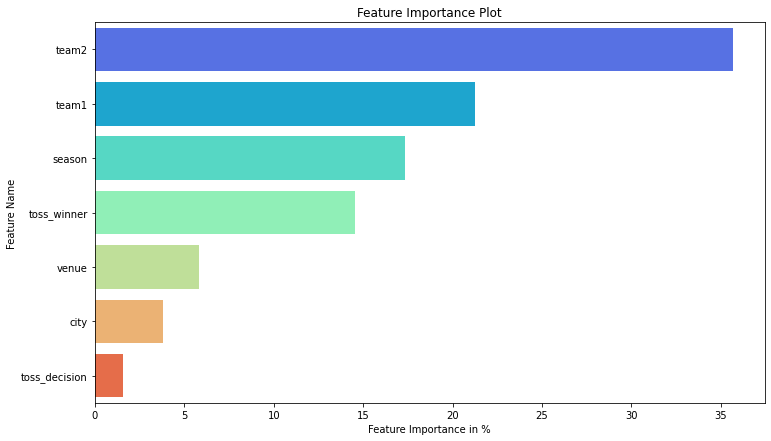

In [71]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0],y=x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [72]:
model_gscv = {best_grid:'GridSearchCV - RandomForest Classifier'}

### Generate Training data Model performance Metrics


Checking the Metrics for Predictions on the Training set

Generating Metrics for GridSearchCV - RandomForest Classifier 
	RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=6,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=101, oob_score=1, random_state=101)

Accuracy for GridSearchCV - RandomForest Classifier model is 
 0.7296181630546955


Classification report for GridSearchCV - RandomForest Classifier model is 
               precision    recall  f1-score   support

           1       0.78      0.69      0.73       133
           2       0.82      0.72      0.77       123
           3       0.76      0.61      0.68       116
           4       0.79      0.52      0.63       111
           5       0.83      0.94      0.88        16
           6       0.77      0.69      0.73       100
           7       0.76      0.74      0.75        78
           8       0.64      1.00      0.78        35
           9   

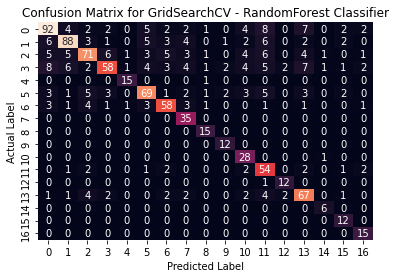

In [73]:
print ("\nChecking the Metrics for Predictions on the Training set\n")
classification_model(model_gscv, X, y)

## Verify the Predictions on Testing Dataset

In [74]:
#'team1', 'team2','city', 'toss_decision', 'toss_winner', 'venue', 
teamcode = teams['team_codes']

def predict_winner(model, input):
    output=model.predict(input)
    winner_name = get_team_name(output, teams)
#    print("The predicted winner is Team {} - {}".format(output, winner_name))
    return winner_name

## Get Predicted Winner for the given input below.

In [75]:
def get_prediction(season,T1,T2,city,toss,toss_decision,venue, best_grid):
    season = season
    team1= teamcode[T1]
    team2= teamcode[T2]
    city = le_city.transform([city])[0] 
    toss_decision = le_toss.transform([toss_decision])[0] 
    toss_winner= teamcode[toss]
    venue = le_venue.transform([venue])[0]  

    input=[season, team1, team2, city, toss_decision, toss_winner, venue]
    input = np.array(input).reshape((1, -1))

    winner = predict_winner(best_grid, input)
    return winner

In [78]:
season = 2020
team1= teamcode['KKR'] 
team2= teamcode['RCB']
city = le_city.transform(['Bengaluru'])[0] 
toss_decision = le_toss.transform(['bat'])[0]  #[0-'bat', 1-'field']
toss_winner= teamcode['RCB']
venue = le_venue.transform(['M Chinnaswamy Stadium'])[0]  

input=[season, team1, team2, city, toss_decision, toss_winner, venue]
input = np.array(input).reshape((1, -1))
#print(input)

winner = predict_winner(best_grid, input)
print("The predicted winner is:", winner)

The predicted winner is: Royal Challengers Bangalore


In [79]:
#Get following Input from webpage
season = 2020
T1 = 'RCB'
T2 = 'CSK'
city = 'Dubai'
toss = 'CSK'
toss_decision = 'bat'
venue = 'Dubai International Cricket Stadium'

# Pass the best_grid and get_prediction function to pickle and input the above variables from webpage.
winner = get_prediction(season,T1,T2,city,toss,toss_decision,venue, best_grid)

#Get output in return, which can be displayed in webpage.
print("The predicted winner is:", winner)

The predicted winner is: Chennai Super Kings


In [80]:
pickle.dump(best_grid, open('iplmodel.pkl', 'wb'))

## Testing the Code and lookup values

In [205]:
teamname = {1: 'Mumbai Indians', 2: 'Chennai Super Kings', 3: 'Kolkata Knight Riders', 4: 'Royal Challengers Bangalore',
                        5: 'Punjab Kings', 6: 'Rajasthan Royals', 7: 'Sunrisers Hyderabad', 8: 'Delhi Capitals', 9: 'Gujarat Titans', 10: 'Lucknow Super Giants'}

col=["season", "team1", "team2", "city", "toss_decision", "toss_winner", "venue"]

In [206]:
input_val = [2023, 2, 4, 2, 0, 2, 16]

pred_df = pd.DataFrame(data=np.array(input_val).reshape(1,-1), columns=col)
pred_df.head()

,season,team1,team2,city,toss_decision,toss_winner,venue
0,2023,2,4,2,0,2,16


In [207]:
preds_result = best_grid.predict(np.array(pred_df))
preds_result, preds_result[0], int(preds_result), teamname[preds[0]]

(array([3], dtype=int64), 3, 3, 'Kolkata Knight Riders')

In [197]:
preds

array([3], dtype=int64)

In [209]:
if (preds_result[0] == int(pred_df['team1'][0])) or (preds_result[0] == int(pred_df['team2'][0] )):
                preds_name = teamname[preds_result[0]]
                print(f"Correct prediction {preds_name}")
                
else:
                print(f"Prediction is {teamname[preds_result[0]]}, while Team1: {teamname[pred_df['team1'][0]]} and Team2:{teamname[pred_df['team2'][0]]}. Prediction defaulted to Team2")
                print(f"Prediction is wrong {preds_result[0]}")
                preds_m = int(pred_df['team2'][0] )
                preds_name = teamname[preds_m] + '.'
                print(f"Wrong prediction {preds_name}")
                

Prediction is Kolkata Knight Riders, while Team1: Chennai Super Kings and Team2:Royal Challengers Bangalore. Prediction defaulted to Team2
Prediction is wrong 3
Wrong prediction Royal Challengers Bangalore.


In [177]:
teamname[preds[0]]
print( f"Prediction is {teamname[preds[0]]}, while Team1: {teamname[pred_df['team1'][0]]} and Team2:{teamname[pred_df['team2'][0]]}. Prediction defaulted to Team2")

Prediction is Kolkata Knight Riders, while Team1: Chennai Super Kings and Team2:Royal Challengers Bangalore. Prediction defaulted to Team2


In [175]:
int(preds)

3

In [164]:
pred_df['team1'][0]

2

In [116]:
np.array(pred_df)

(1, 7)

In [215]:
x = np.random.randint(1, 2)
"team" + str(x)

'team1'

In [81]:
toss_dict = {}
for t in le_toss.classes_:
    a = le_toss.transform([t])[0]
    print("    <option value='{}'>{}</option>".format(a,t))
    toss_dict[a] = t
toss_dict

    <option value='0'>bat</option>
    <option value='1'>field</option>


{0: 'bat', 1: 'field'}

In [82]:
city_dict = {}
for c in le_city.classes_:
    a = le_city.transform([c])[0]
    print("    <option value='{}'>{}</option>".format(a,c))
    city_dict[a] = c
city_dict

    <option value='0'>Abu Dhabi</option>
    <option value='1'>Ahmedabad</option>
    <option value='2'>Bengaluru</option>
    <option value='3'>Bloemfontein</option>
    <option value='4'>Cape Town</option>
    <option value='5'>Centurion</option>
    <option value='6'>Chandigarh</option>
    <option value='7'>Chennai</option>
    <option value='8'>Cuttack</option>
    <option value='9'>Delhi</option>
    <option value='10'>Dharamsala</option>
    <option value='11'>Dubai</option>
    <option value='12'>Durban</option>
    <option value='13'>East London</option>
    <option value='14'>Guwahati</option>
    <option value='15'>Hyderabad</option>
    <option value='16'>Indore</option>
    <option value='17'>Jaipur</option>
    <option value='18'>Johannesburg</option>
    <option value='19'>Kanpur</option>
    <option value='20'>Kimberley</option>
    <option value='21'>Kochi</option>
    <option value='22'>Kolkata</option>
    <option value='23'>Lucknow</option>
    <option value='24'>Mu

{0: 'Abu Dhabi',
 1: 'Ahmedabad',
 2: 'Bengaluru',
 3: 'Bloemfontein',
 4: 'Cape Town',
 5: 'Centurion',
 6: 'Chandigarh',
 7: 'Chennai',
 8: 'Cuttack',
 9: 'Delhi',
 10: 'Dharamsala',
 11: 'Dubai',
 12: 'Durban',
 13: 'East London',
 14: 'Guwahati',
 15: 'Hyderabad',
 16: 'Indore',
 17: 'Jaipur',
 18: 'Johannesburg',
 19: 'Kanpur',
 20: 'Kimberley',
 21: 'Kochi',
 22: 'Kolkata',
 23: 'Lucknow',
 24: 'Mumbai',
 25: 'Nagpur',
 26: 'Navi Mumbai',
 27: 'Port Elizabeth',
 28: 'Pune',
 29: 'Raipur',
 30: 'Rajkot',
 31: 'Ranchi',
 32: 'Sharjah',
 33: 'Visakhapatnam'}

In [83]:
venue_dict = {}
for ven in le_venue.classes_:
    a = le_venue.transform([ven])[0]
    print("    <option value='{}'>{}</option>".format(a,ven))
    venue_dict[a] = ven
venue_dict

    <option value='0'>ACA-VDCA Stadium</option>
    <option value='1'>Barabati Stadium</option>
    <option value='2'>Barsapara Cricket Stadium</option>
    <option value='3'>Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium</option>
    <option value='4'>Brabourne Stadium</option>
    <option value='5'>Buffalo Park</option>
    <option value='6'>De Beers Diamond Oval</option>
    <option value='7'>Dr DY Patil Sports Academy</option>
    <option value='8'>Dubai International Cricket Stadium</option>
    <option value='9'>Eden Gardens</option>
    <option value='10'>Feroz Shah Kotla</option>
    <option value='11'>Green Park</option>
    <option value='12'>Himachal Pradesh Cricket Association Stadium</option>
    <option value='13'>Holkar Cricket Stadium</option>
    <option value='14'>JSCA International Stadium Complex</option>
    <option value='15'>Kingsmead</option>
    <option value='16'>M Chinnaswamy Stadium</option>
    <option value='17'>MA Chidambaram Stadium Chepauk

{0: 'ACA-VDCA Stadium',
 1: 'Barabati Stadium',
 2: 'Barsapara Cricket Stadium',
 3: 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium',
 4: 'Brabourne Stadium',
 5: 'Buffalo Park',
 6: 'De Beers Diamond Oval',
 7: 'Dr DY Patil Sports Academy',
 8: 'Dubai International Cricket Stadium',
 9: 'Eden Gardens',
 10: 'Feroz Shah Kotla',
 11: 'Green Park',
 12: 'Himachal Pradesh Cricket Association Stadium',
 13: 'Holkar Cricket Stadium',
 14: 'JSCA International Stadium Complex',
 15: 'Kingsmead',
 16: 'M Chinnaswamy Stadium',
 17: 'MA Chidambaram Stadium Chepauk',
 18: 'Maharashtra Cricket Association Stadium',
 19: 'Narendra Modi Stadium',
 20: 'Nehru Stadium',
 21: 'New Wanderers Stadium',
 22: 'Newlands',
 23: 'OUTsurance Oval',
 24: 'Punjab Cricket Association Stadium Mohali',
 25: 'Rajiv Gandhi International Stadium',
 26: 'Sardar Patel Stadium Motera',
 27: 'Saurashtra Cricket Association Stadium',
 28: 'Sawai Mansingh Stadium',
 29: 'Shaheed Veer Narayan Singh Internation